In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
%matplotlib inline

import galsim

from astropy.io import fits
from helperFunctions import *

In [2]:
scratchdir = '/global/cscratch1/sd/chebert/rawSpeckles/'

In [3]:
# find all image files in the scratch directory
fileNames = ! ls /global/cscratch1/sd/chebert/rawSpeckles/ | grep 'img' 

In [4]:
# check image shapes
for file in fileNames:
    hdu = fits.open(scratchdir + file)
    img = hdu[0].data[0]
    hdu.close
    if np.shape(img) != (256, 256):
        print(f'{file}: {np.shape(img)}')
print('done!')

done!


In [7]:
len(fileNames)

178

### Try estimating backgrounds:

#### example image

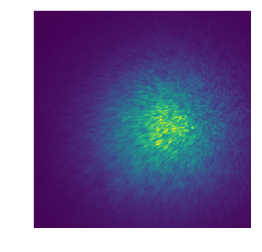

In [8]:
file = fileNames[0]
hdu = fits.open(scratchdir + file)
series = hdu[0].data
hdu.close

plt.imshow(series[0])
plt.show()

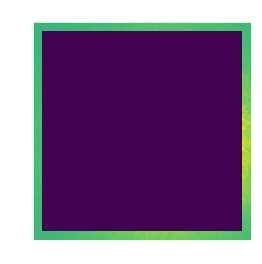

standard deviation: 86.02
2 sigma clipped standard deviation: 65.74


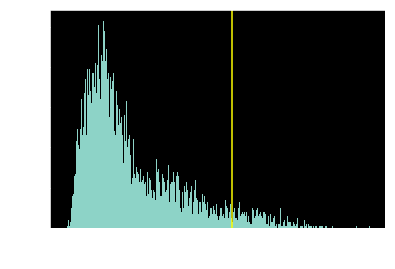

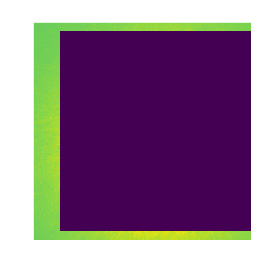

standard deviation, centered: 47.37
2 sigma clipped standard deviation, centered: 37.37


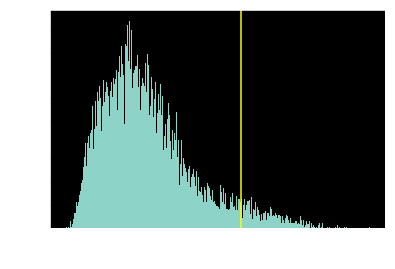

In [9]:
demonstrateCenteringMask(series[0], (10, 10), plot=True)

### Run centered estimation on all files

In [10]:
# sample point to calculate background sigma
N = 10
samples = np.linspace(0,999,10)

backgrounds = np.zeros((len(fileNames),N))

for j in range(len(fileNames)):
    file = fileNames[j]
    hdulist = fits.open(scratchdir + file)
    series = hdulist[0].data
    hdulist.close()
    
    # calculate the background for N samples in each image series
    for i in range(N):
        backgrounds[j, i] = estimateBackground(image=series[int(samples[i])], maskSize=(10, 10), plot=False)
        

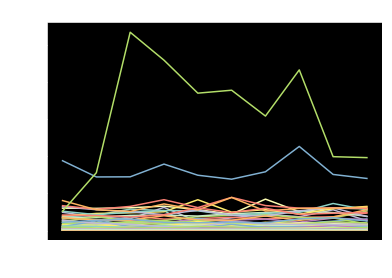

In [11]:
for i in range(int(backgrounds.shape[0]/2)):
    plt.plot(samples, backgrounds[i])
plt.title('background sigma for 10 frames in all datasets')
plt.xlabel('frame index')
plt.ylabel('sigma')
plt.show()

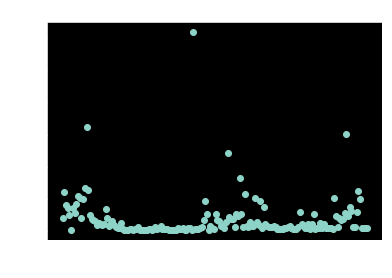

In [13]:
meanSigs = np.mean(backgrounds, axis=1)
plt.plot(np.linspace(1,178,178), meanSigs, 'o')
plt.title('average background sigma for all datasets')
plt.xlabel('dataset')
plt.ylabel('sigma')
plt.show()

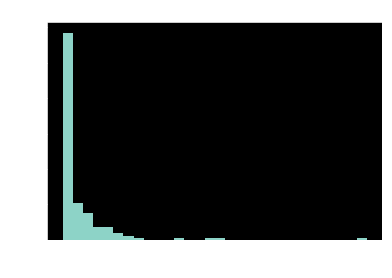

In [14]:
plt.hist(meanSigs, bins=30)
plt.title('histogram of background sigmas')
plt.xlabel('sigma')
plt.ylabel('occurance')
plt.show()

### outliers

In [15]:
aOutliers = np.argsort(meanSigs[:89])[::-1][:20]
bOutliers = np.argsort(meanSigs[89:])[::-1][:20]

In [16]:
print([fileNames[i] for i in aOutliers])
print([fileNames[i] for i in bOutliers])

['img_a_380.fits', 'img_a_072.fits', 'img_a_067.fits', 'img_a_074.fits', 'img_a_017.fits', 'img_a_051.fits', 'img_a_054.fits', 'img_a_063.fits', 'img_a_405.fits', 'img_a_042.fits', 'img_a_019.fits', 'img_a_032.fits', 'img_a_021.fits', 'img_a_098.fits', 'img_a_034.fits', 'img_a_409.fits', 'img_a_075.fits', 'img_a_022.fits', 'img_a_101.fits', 'img_a_062.fits']
['img_a_380.fits', 'img_a_034.fits', 'img_a_072.fits', 'img_a_405.fits', 'img_a_079.fits', 'img_a_346.fits', 'img_a_094.fits', 'img_a_409.fits', 'img_a_101.fits', 'img_a_382.fits', 'img_a_1039.fits', 'img_a_388.fits', 'img_a_398.fits', 'img_a_212.fits', 'img_a_378.fits', 'img_a_004.fits', 'img_a_074.fits', 'img_a_063.fits', 'img_a_272.fits', 'img_a_067.fits']


In [17]:
# somehow want to plot these to compare? / see what they look like

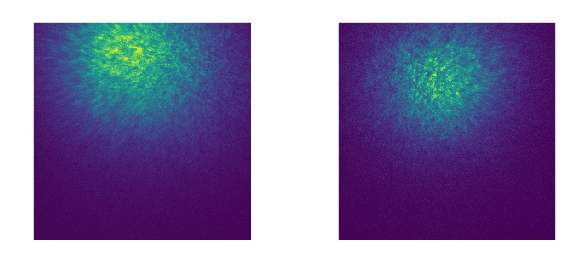

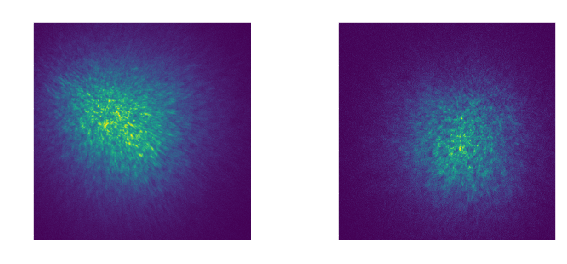

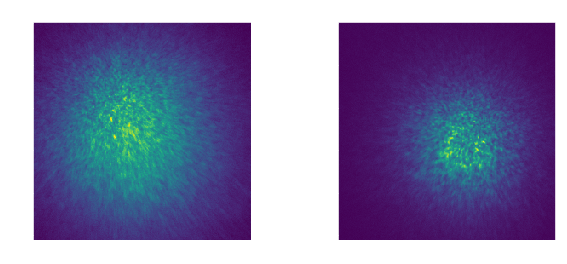

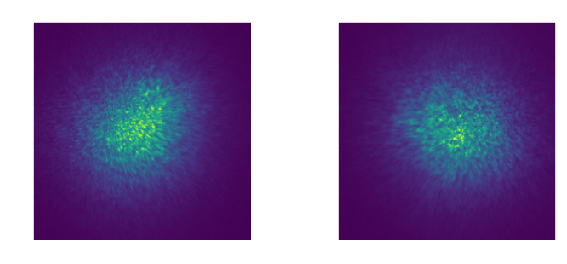

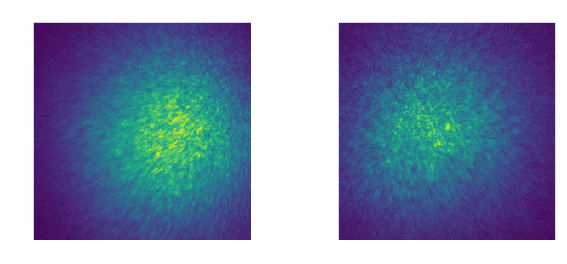

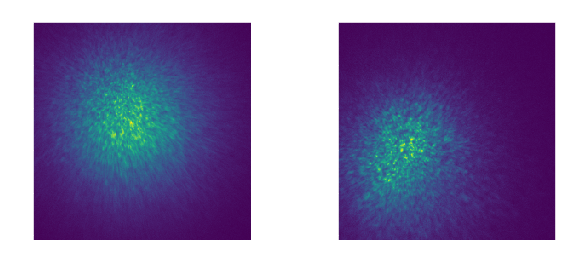

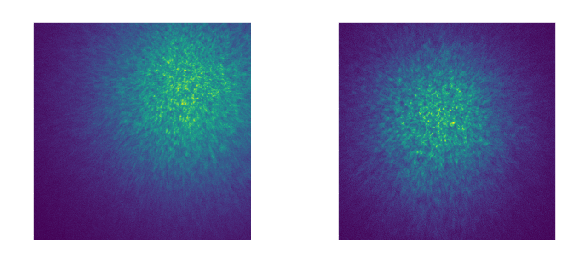

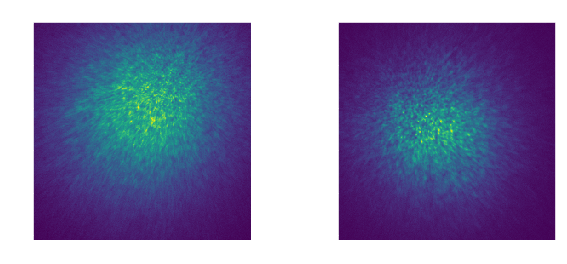

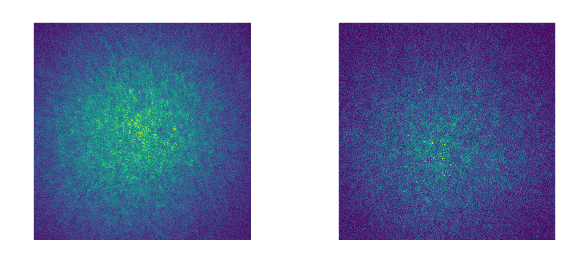

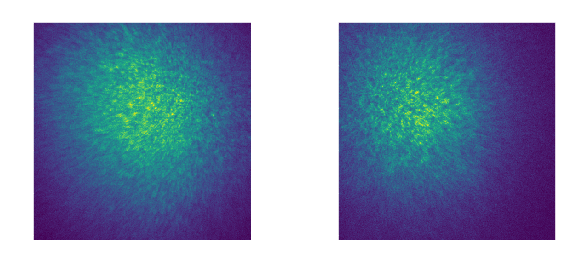

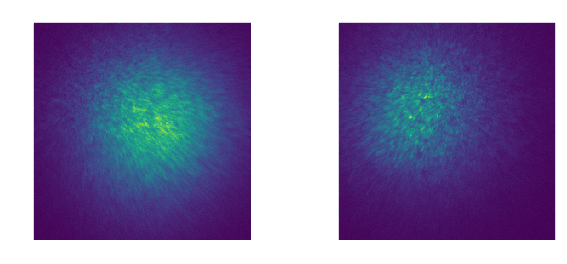

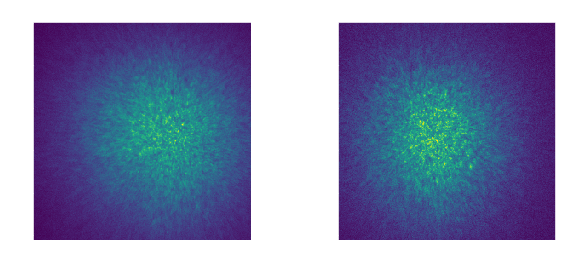

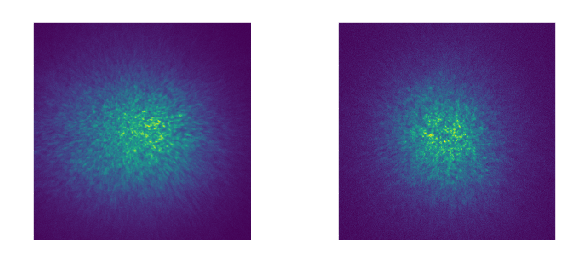

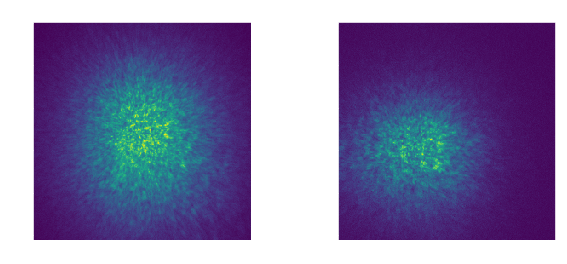

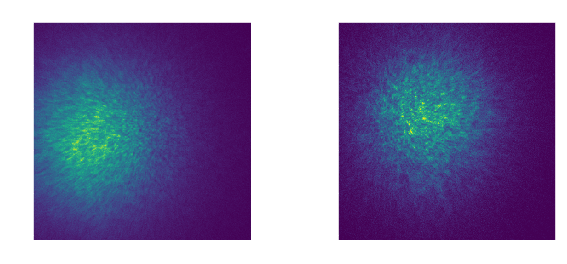

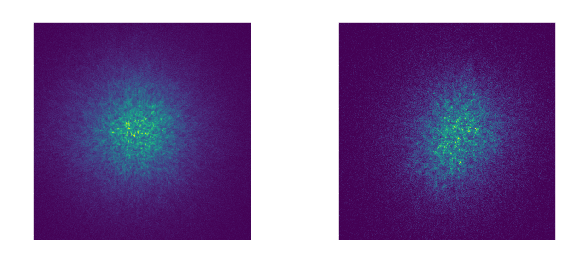

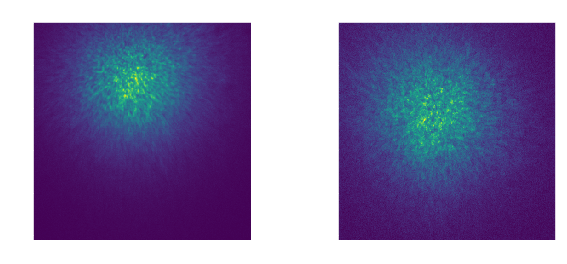

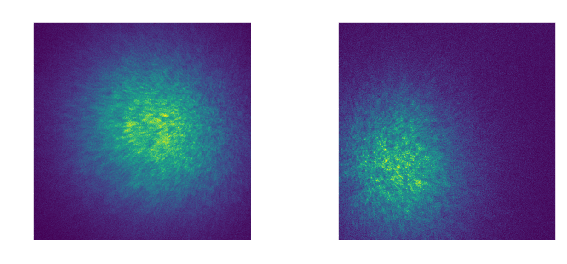

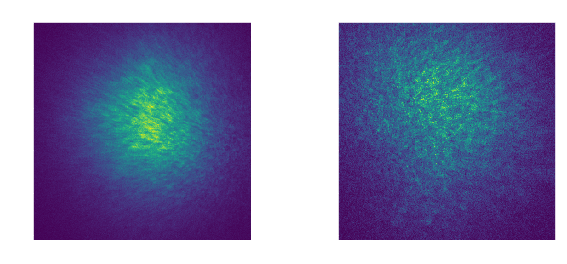

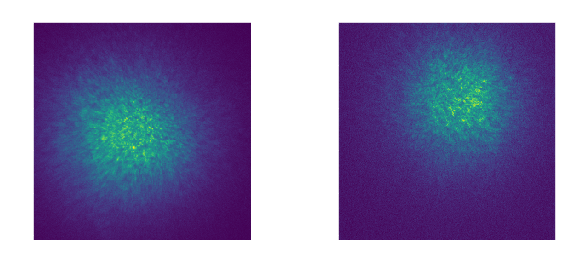

In [18]:
for i in aOutliers:
    hdu = fits.open(scratchdir + fileNames[i])
    aSeries = hdu[0].data
    hdu.close()

    hdu = fits.open(scratchdir + fileNames[i+89])
    bSeries = hdu[0].data
    hdu.close()

    idx = np.random.randint(0,1000)

    plt.figure(figsize=(10,4))
    
    plt.subplot(121)
    plt.title(fileNames[i])
    plt.imshow(aSeries[idx])
    plt.subplot(122)
    plt.title(fileNames[i+89])
    plt.imshow(bSeries[idx])
    plt.show()

In [ ]:
fileNames[0], fileNames[89]